# Importing Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Discovering Our Dataset

In [2]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

### DROPPING UNNESSCARY FEATURES

In [5]:
unused_f = ["customer_id"]
df.drop(columns=unused_f,inplace=True)

In [6]:
df.shape

(10000, 11)

# Data Preprocessing

## Data Cleaning

### Checking for Null Values

In [7]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Some Stastical Insights

In [8]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Splitting features into numeric and categorical

In [9]:
df_num = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_cat = df.select_dtypes(include=['object']).columns.tolist()

## Data Exploration For Numeric Features

In [10]:
num_cols = len(df_num)

# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols

# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=df_num)

# Add scatter plots to each subplot
for i, col in enumerate(df_num):
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Histogram(x=df[col], name=col, marker=dict(color='blue')), row=row, col=col_num)

# Update layout
fig.update_layout(height=grid_rows * 200, width=grid_cols * 200, title_text=f"Histogram Plots of Numeric Features")

fig.show()

In [11]:
target_col = 'churn'
# Number of columns to plot against the target column
num_cols = len(df_num) - 1  # excluding the target column
# Determine grid size
grid_cols = 6
grid_rows = (num_cols + grid_cols - 1) // grid_cols
# Create subplots
fig = make_subplots(rows=grid_rows, cols=grid_cols, subplot_titles=[col for col in df_num if col != target_col])
# Add scatter plots to each subplot
for i, col in enumerate(df_num):
    if col == target_col:
        continue
    row = i // grid_cols + 1
    col_num = i % grid_cols + 1
    fig.add_trace(go.Scatter(x=df[col], y=df[target_col], mode='markers', marker=dict(color='blue', line=dict(color='black', width=1))), row=row, col=col_num)
# Update layout
fig.update_layout(height=grid_rows * 200, width=grid_cols * 200, title_text=f"Scatter Plots of Numeric Features vs {target_col}")
fig.show()

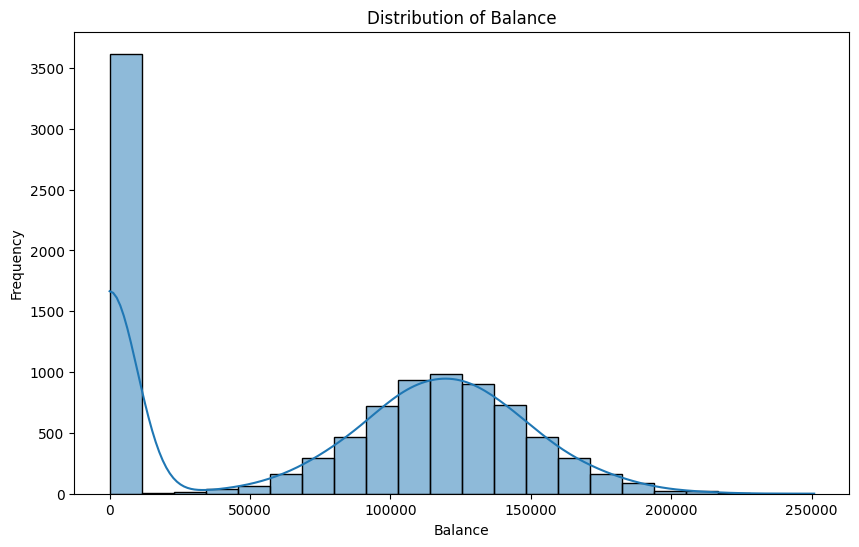

In [12]:
# Check distribution of 'balance' column
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Calculate correlation
correlation = df['balance'].corr(df['churn'])
print(f"Correlation between 'balance' and 'churn': {correlation}")

Correlation between 'balance' and 'churn': 0.1185327687716338


In [14]:
# Count zero values in 'balance' column
zero_balance_count = (df['balance'] == 0).sum()
print("Number of zero values in 'balance' column:", zero_balance_count)

Number of zero values in 'balance' column: 3617


## HANDELING OUTLEIRS

Check For Outliers

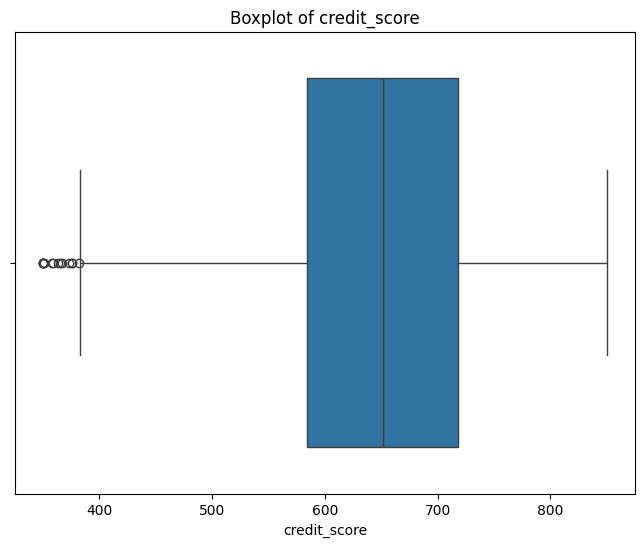

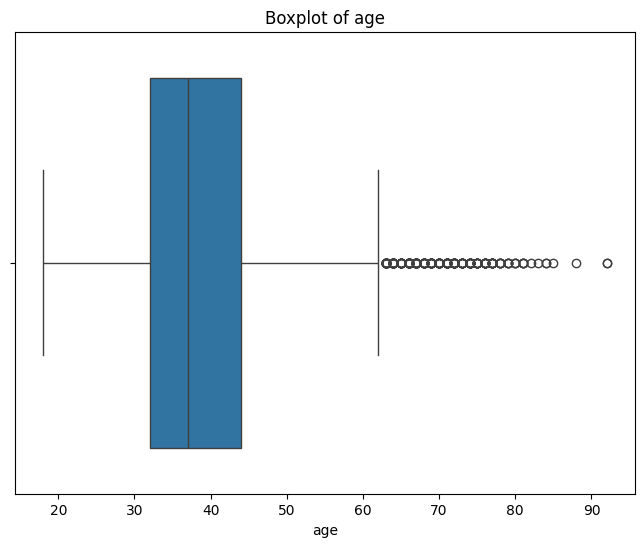

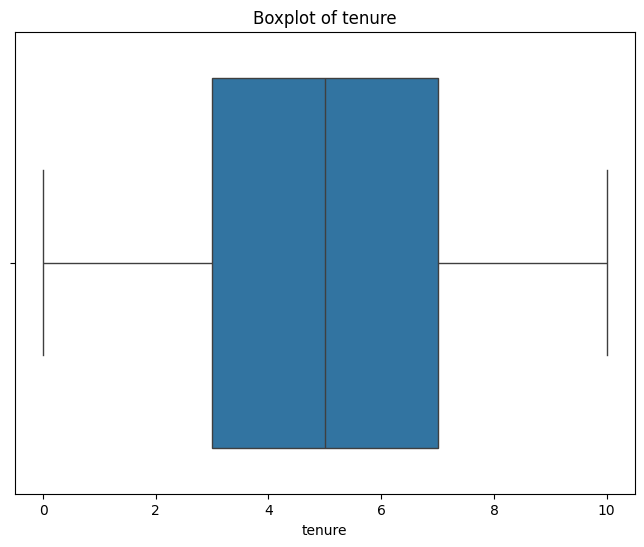

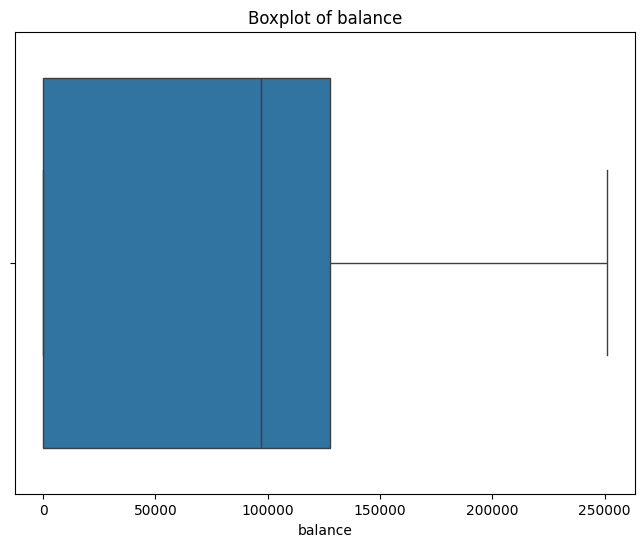

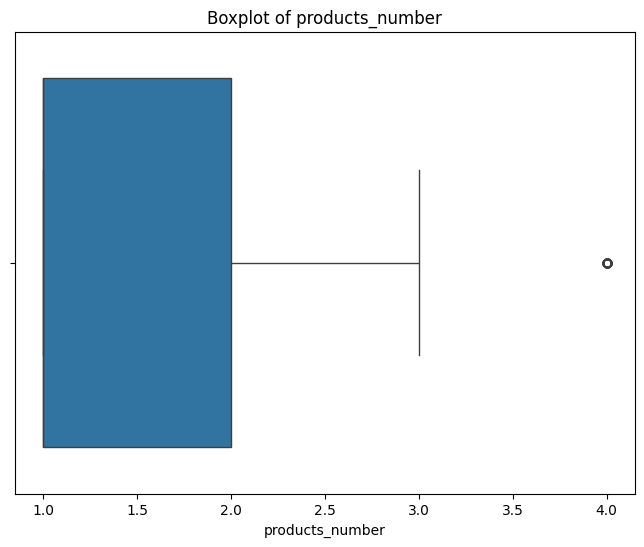

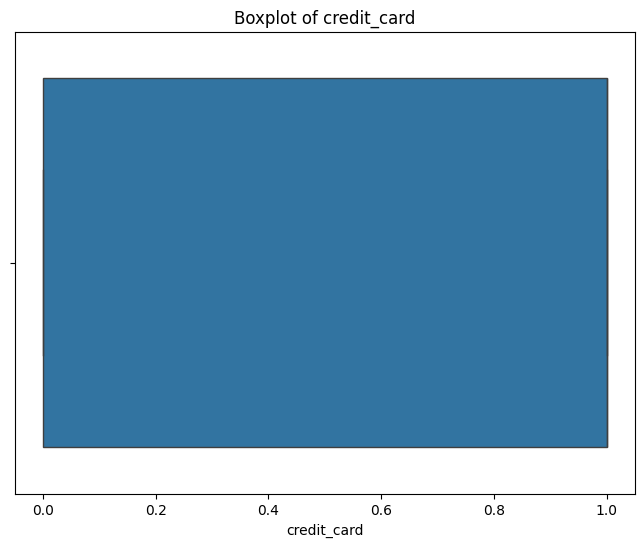

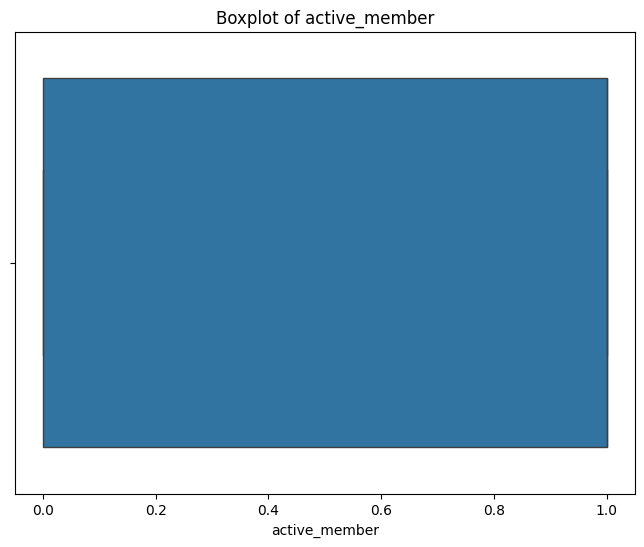

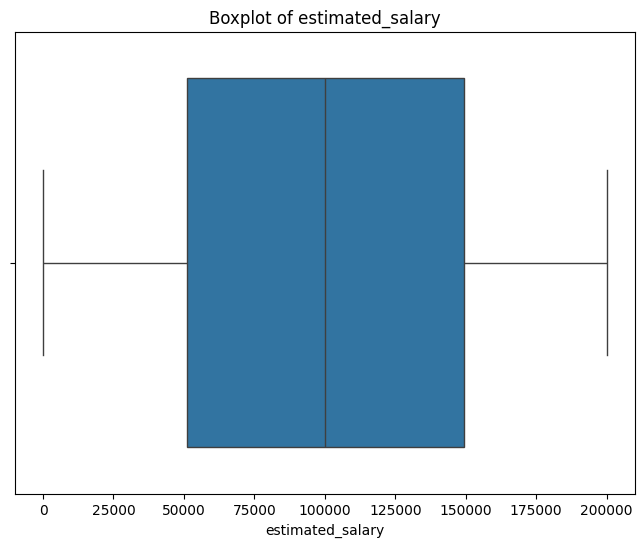

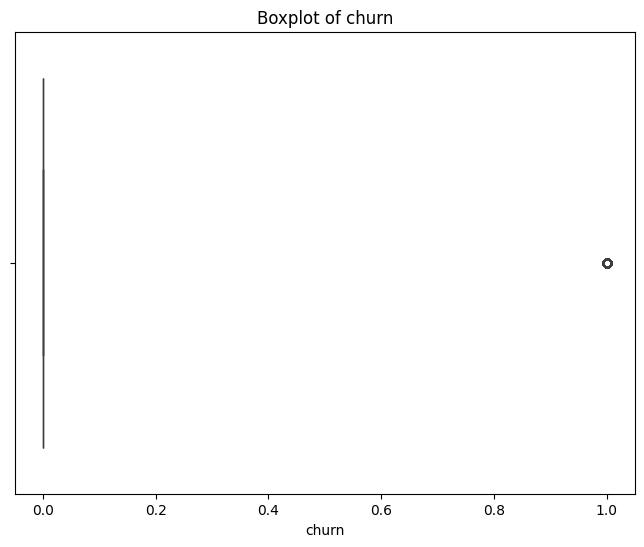

In [15]:
# Check For Outliers
for col in df_num:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [16]:
# Calculate number of outliers for each column
for col in df_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    num_outliers = outliers.shape[0]
    print(f"Number of outliers in {col}: {num_outliers}")


Number of outliers in credit_score: 15
Number of outliers in age: 359
Number of outliers in tenure: 0
Number of outliers in balance: 0
Number of outliers in products_number: 60
Number of outliers in credit_card: 0
Number of outliers in active_member: 0
Number of outliers in estimated_salary: 0
Number of outliers in churn: 2037


In [17]:
# Handle outliers in 'credit_score' with capping
upper_limit_credit = df['credit_score'].quantile(0.99)
lower_limit_credit = df['credit_score'].quantile(0.01)
df['credit_score'] = np.clip(df['credit_score'], lower_limit_credit, upper_limit_credit)

# Handle outliers in 'products_number' with flooring and capping
upper_limit_products = df['products_number'].quantile(0.99)
lower_limit_products = df['products_number'].quantile(0.01)
df['products_number'] = np.clip(df['products_number'], lower_limit_products, upper_limit_products)

In [18]:
# Calculate number of outliers for each column
for col in df_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    num_outliers = outliers.shape[0]
    print(f"Number of outliers in {col}: {num_outliers}")


Number of outliers in credit_score: 0
Number of outliers in age: 359
Number of outliers in tenure: 0
Number of outliers in balance: 0
Number of outliers in products_number: 0
Number of outliers in credit_card: 0
Number of outliers in active_member: 0
Number of outliers in estimated_salary: 0
Number of outliers in churn: 2037


In [19]:
df['churn'].unique()

array([1, 0])

In [20]:
df['age'].max()

92

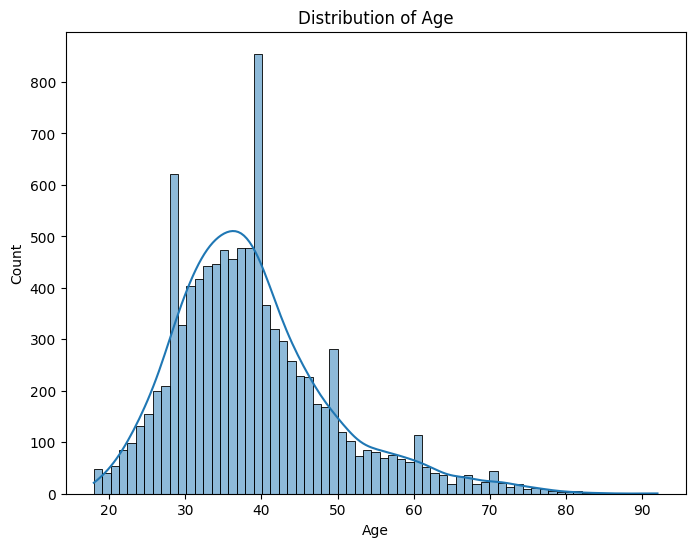

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Data Exploration For Categorical Features

In [22]:
for col in df_cat:
  print(f"Unique values in {col}: {df[col].unique()}")

Unique values in country: ['France' 'Spain' 'Germany']
Unique values in gender: ['Female' 'Male']


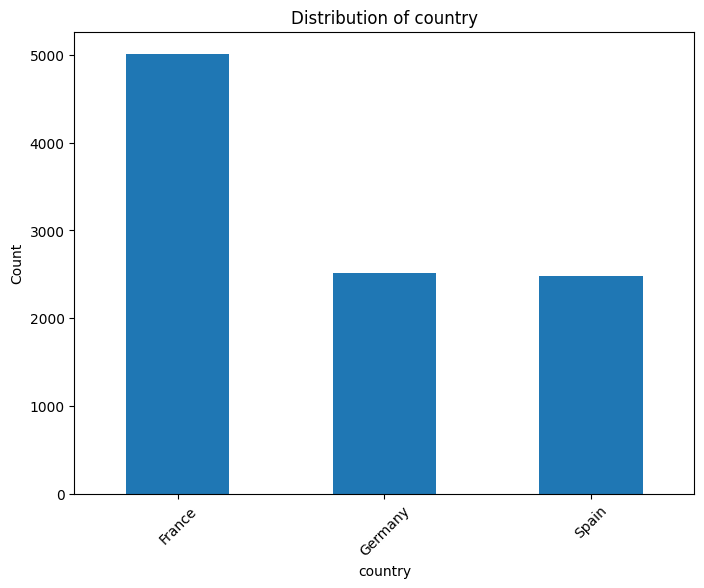

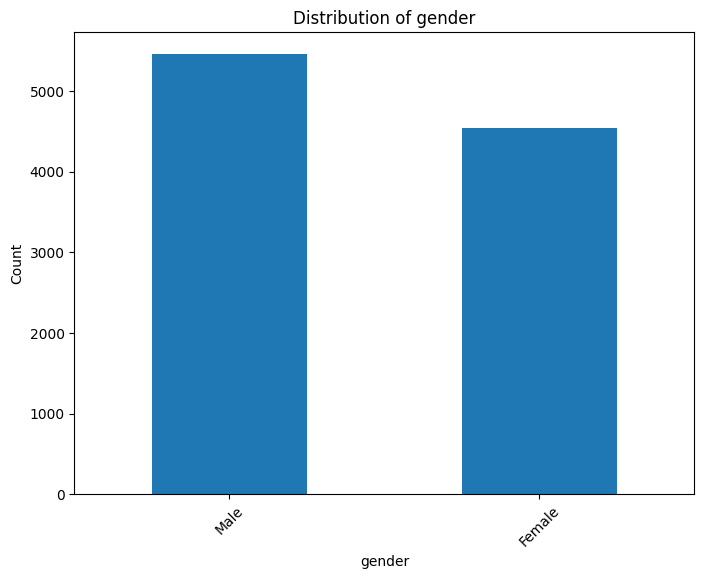

In [23]:
for col in df_cat:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

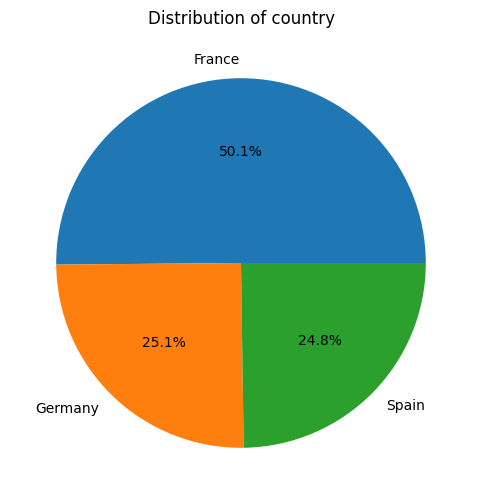

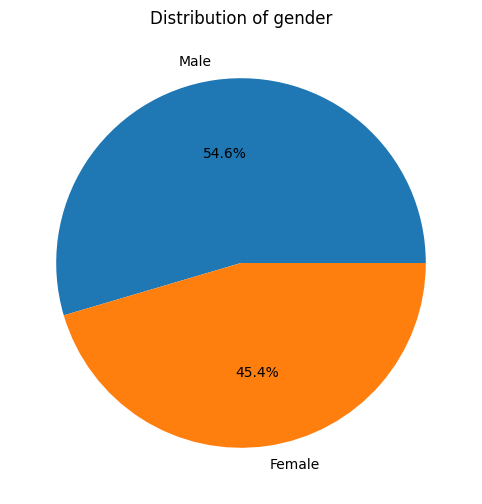

In [25]:
# Create a pie chart for the distribution of a categorical feature
for col in df_cat:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Distribution of {col}")
    plt.ylabel('')  # Remove the default ylabel
    plt.show()


## Distribution of each Unique value With Churn = 1

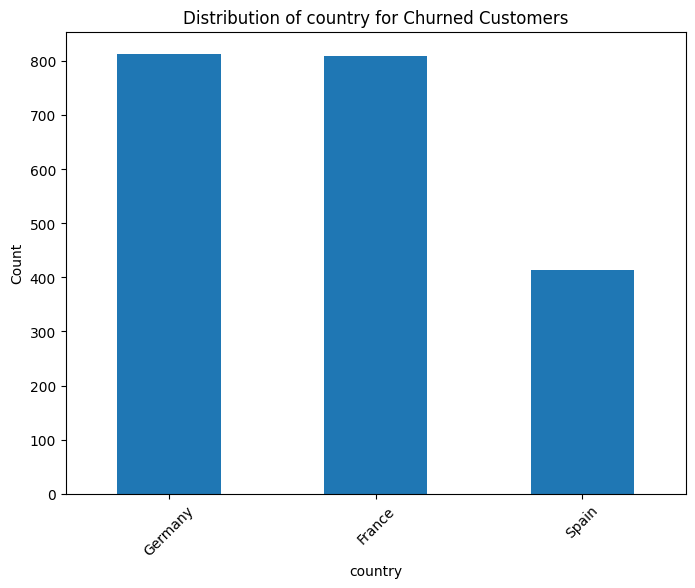

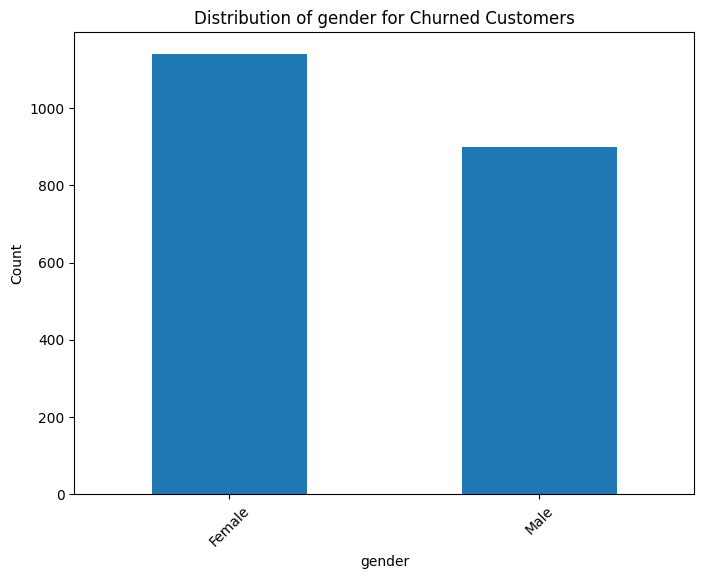

In [24]:
for col in df_cat:
    plt.figure(figsize=(8, 6))
    df[df['churn'] == 1][col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col} for Churned Customers")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


## Encoding Categorical Features

In [25]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in df_cat:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


## Feature Engineering

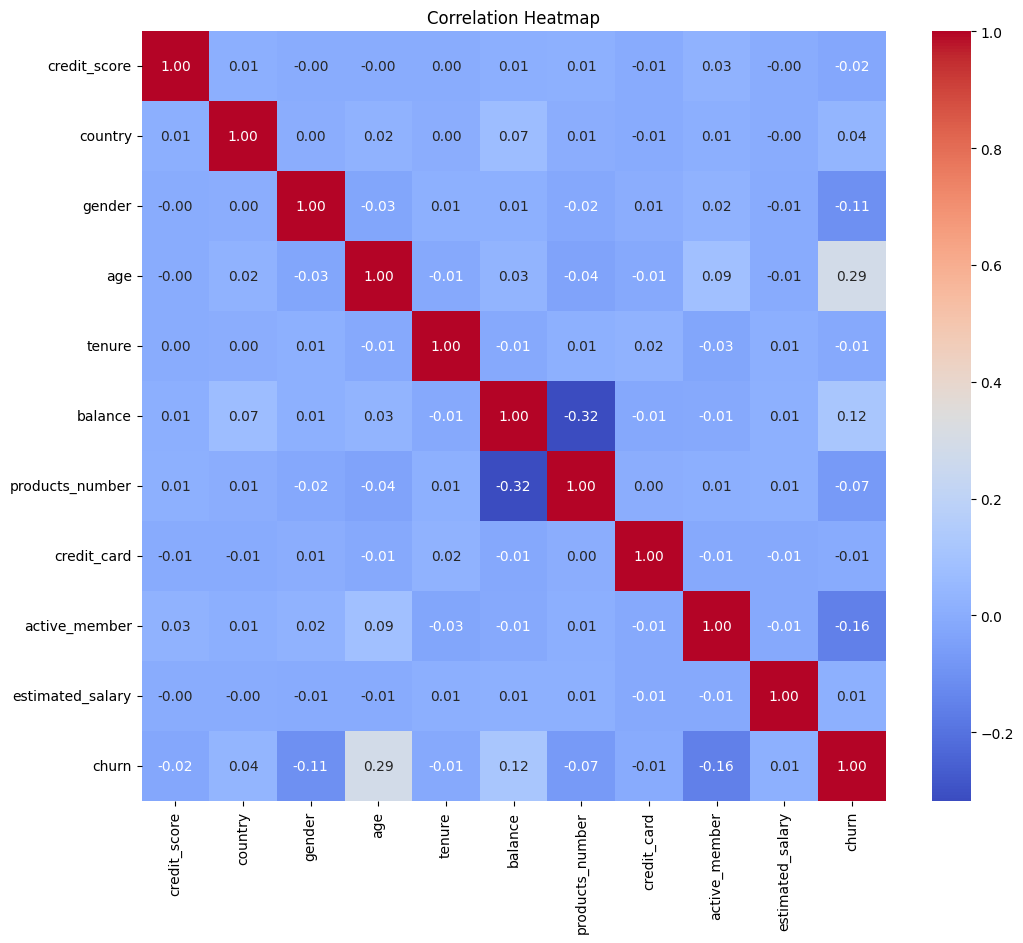

In [26]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Handeling Skewness Features

In [27]:
# Check skewness for numerical features
for col in df_num:
    skewness = skew(df[col])
    print(f"Skewness of {col}: {skewness}")

Skewness of credit_score: -0.03685414722595395
Skewness of age: 1.0111685586628079
Skewness of tenure: 0.010989809189781041
Skewness of balance: -0.14108754375291138
Skewness of products_number: 0.4589754531479631
Skewness of credit_card: -0.9016763178640548
Skewness of active_member: -0.06042756246298516
Skewness of estimated_salary: 0.0020850448448748848
Skewness of churn: 1.4713899141398699


### Target Variable Distribution "Churn"

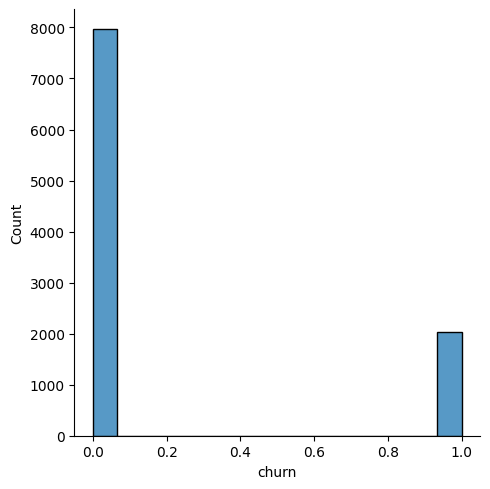

In [28]:
sns.displot(df["churn"])


In [29]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


##  Separate features and target variable


In [30]:
X = df.drop('churn', axis=1)
y = df['churn']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [33]:
# Select numerical features for scaling
num_features = ['age', 'credit_score', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary','tenure']

In [34]:
# Apply Yeo-Johnson transformation to numerical features
transformer = PowerTransformer(method='yeo-johnson')
X_train_transformed = transformer.fit_transform(X_train[num_features])
X_test_transformed = transformer.transform(X_test[num_features])

# Scale the transformed numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

# Update the training and testing sets with scaled numerical features
X_train[num_features] = X_train_scaled
X_test[num_features] = X_test_scaled

# Modeling

Fist Model ( Logistic Regression )


In [35]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8245


## 2ND MODEL ( LGBM )

In [38]:
# Initialize and train the LGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


In [39]:
# Evaluate the model
accuracy_lgb = lgb_model.score(X_test, y_test)
print(f"LGBM Accuracy: {accuracy_lgb}")

LGBM Accuracy: 0.8615


## 3RD model ( SVM )

In [40]:
# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [41]:
# Evaluate the model
accuracy_svm = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.858


## Feature Importance

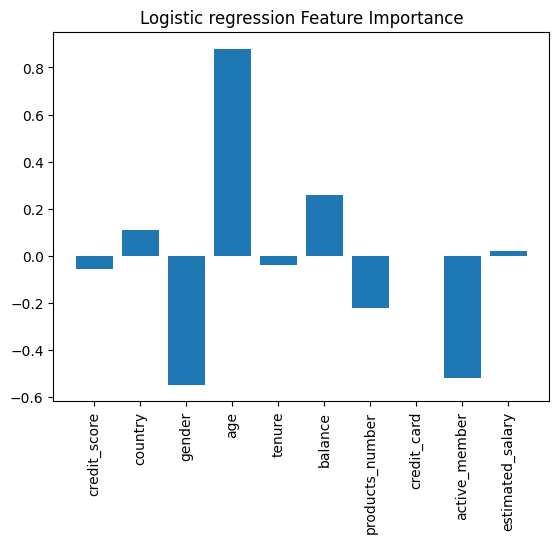

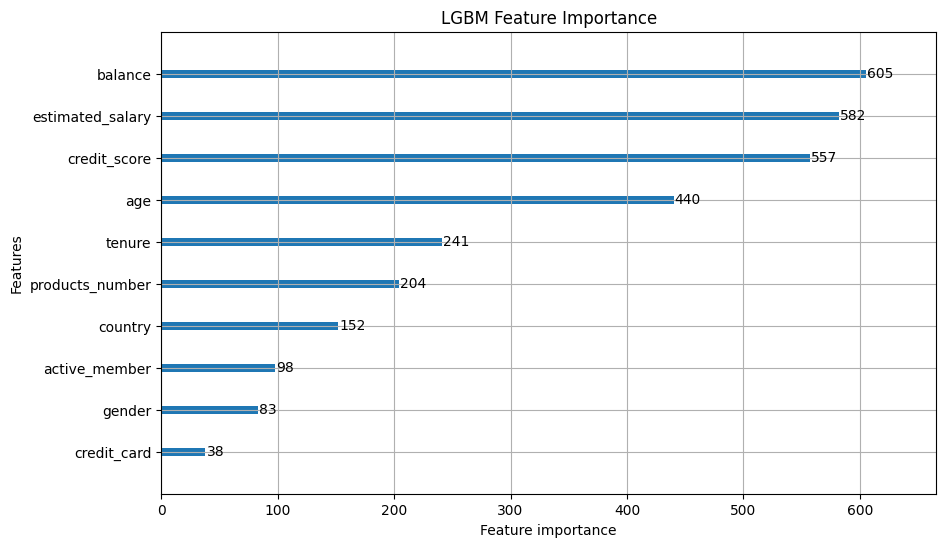

In [44]:
# Logistic Regression Feature Importance
importance = model.coef_[0]
feature_names = X_train.columns
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title("Logistic regression Feature Importance")
plt.show()

# LGBM Feature Importance
lgb.plot_importance(lgb_model, figsize=(10, 6))
plt.title("LGBM Feature Importance")
plt.show()

# Comparison Between Models

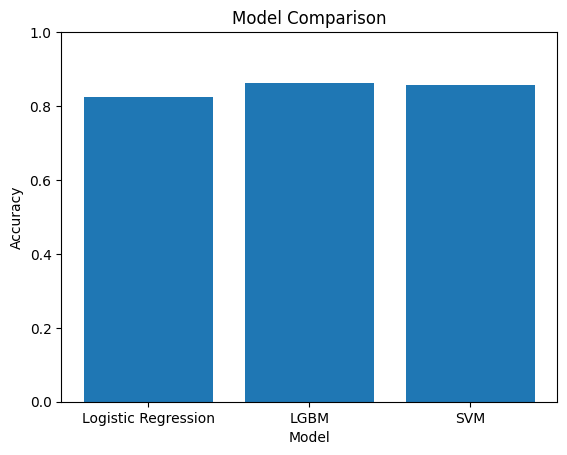

Logistic Regression Accuracy: 0.8245
LGBM Accuracy: 0.8615
SVM Accuracy: 0.858


In [45]:
# Compare model accuracies
models = ['Logistic Regression', 'LGBM', 'SVM']
accuracies = [accuracy, accuracy_lgb, accuracy_svm]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()

# Print accuracy scores
print("Logistic Regression Accuracy:", accuracy)
print("LGBM Accuracy:", accuracy_lgb)
print("SVM Accuracy:", accuracy_svm)
